## Установка нужных версий библиотек

In [ ]:
!wget 'https://drive.google.com/uc?export=download&id=1oSFOP0j25OZAuhD8YXxyQXNTdr2lUdtn' -O requirements.txt

--2022-03-14 07:40:49--  https://drive.google.com/uc?export=download&id=1oSFOP0j25OZAuhD8YXxyQXNTdr2lUdtn
Resolving drive.google.com (drive.google.com)... 172.217.204.101, 172.217.204.113, 172.217.204.100, ...
Connecting to drive.google.com (drive.google.com)|172.217.204.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ui5f22nreavf9i44035cjktjk4i0e9m2/1647243600000/14904333240138417226/*/1oSFOP0j25OZAuhD8YXxyQXNTdr2lUdtn?e=download [following]
--2022-03-14 07:40:50--  https://doc-0g-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ui5f22nreavf9i44035cjktjk4i0e9m2/1647243600000/14904333240138417226/*/1oSFOP0j25OZAuhD8YXxyQXNTdr2lUdtn?e=download
Resolving doc-0g-c0-docs.googleusercontent.com (doc-0g-c0-docs.googleusercontent.com)... 173.194.212.132, 2607:f8b0:400c:c11::84
Connecting to doc-0g-c0-docs.googleusercontent.com (doc-0g-c0

In [ ]:
!pip install -r requirements.txt

     |████████████████████████████████| 7.1 MB 3.1 MB/s 
     |████████████████████████████████| 9.5 MB 38.3 MB/s 
     |████████████████████████████████| 14.8 MB 46.8 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.22.2.

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import pandas as pd
import matplotlib.pyplot as plt

## Критерии останова или как не переобучить дерево решений




## План

- Вводная часть
    - получение данных
    - обучение модели
- Зачем это нужно?
- Какие есть подходы?
- Как ими пользоваться?

## Вводная часть

### Получение данных

Будем работать с набором данных для задачи регрессии (целевая переменная - стоимость дома) `california_housing`, который можно получить из стандартных датасетов в `sklearn'e`.

После `fetch_california_housing()` возвращается словарь с данными (`data`), целевой переменной (`target`), названиями характеристик в данных (`feature_names`) и описанием данных (`DESCR`).

In [ ]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [ ]:
X = data.data
features = data.feature_names
y = data.target

Из признаков (характеристик данных) и целевой переменной сформируем датафрейм, в качестве названий колонок возьмем названия признаков.

In [ ]:
df_full = pd.DataFrame(X, columns=features)
df_full['target'] = y

df_full.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Для простоты понимания ограничимся десятью объектами из выборки.

In [ ]:
df = df_full.iloc[:10]
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


Разобьем выборку на две: обучающую и тестовую.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df[features],
    df['target'],
    test_size=0.2,
    shuffle=True,
    random_state=3
)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8, 8), (8,), (2, 8), (2,))

### Обучение дерева решений

Инициализируем дерево решений для задачи регрессии и обучим на обучающей выборке (`X_train`) и целевой переменной для обучающих объектов (`y_train`).

In [ ]:
from sklearn.tree import DecisionTreeRegressor


tree = DecisionTreeRegressor(random_state=1)
tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

Теперь визуализируем наше обученное дерево решений. Оно получилось не очень большим. Получилось 7 узлов с вопросами и 8 листов с предсказаниями, кстати именно столько объектов и было в обучающей выборке.

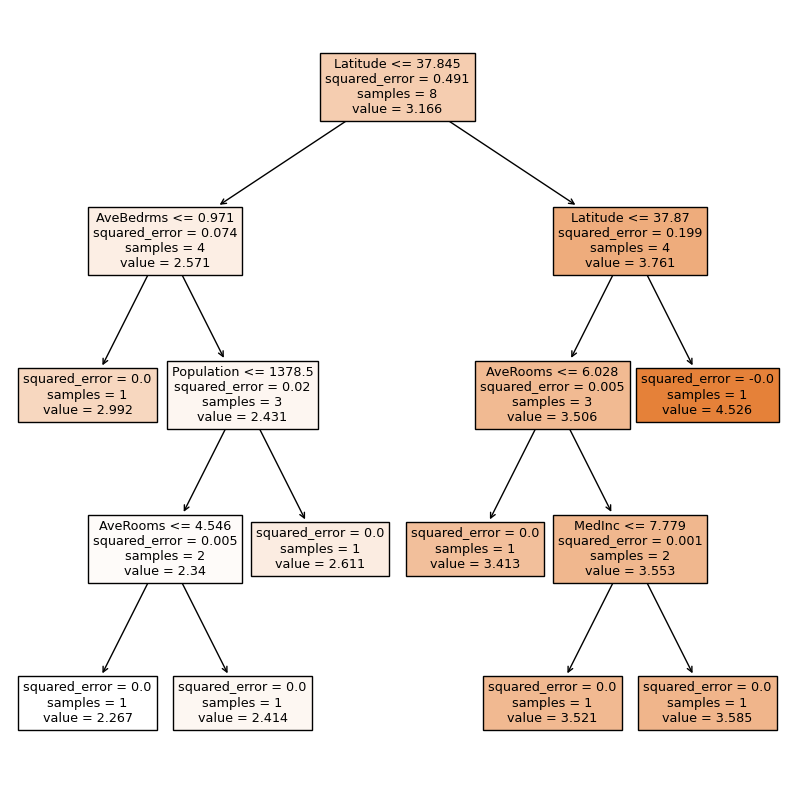

In [ ]:
from sklearn.tree import plot_tree


plt.figure(figsize=(10, 10))
plot_tree(tree, feature_names=features, filled=True);

Узнаем, насколько дерево решений обучилось хорошо, для этого сделаем предсказания моделью для обучающей выборке и для тестовой, а затем посчитаем метрику качества средне-квадратичную ошибку.

In [ ]:
from sklearn.metrics import mean_squared_error

pred_train = tree.predict(X_train)
pred_test = tree.predict(X_test)

mse_train = mean_squared_error(y_train, pred_train)
mse_test = mean_squared_error(y_test, pred_test)

print(f'MSE на обучении {mse_train:.2f}')
print(f'MSE на тесте {mse_test:.2f}')

MSE на обучении 0.00
MSE на тесте 0.26


Метрика на обучении получилась очень маленькая, равная нулю, это говорит нам о том, что во все истинные значения наша модель идеально попала.
Все значения целевого признака из обучения полностью совпадают с предсказанными значениями:

In [ ]:
pd.DataFrame({
    'true': y_train,
    'pred': pred_train
})

,true,pred
1,3.585,3.585
2,3.521,3.521
9,2.611,2.611
6,2.992,2.992
7,2.414,2.414
0,4.526,4.526
3,3.413,3.413
8,2.267,2.267


На тестовой выборке картина далеко не такая идеальная:

In [ ]:
pd.DataFrame({
    'true': y_test,
    'pred': pred_test
})

,true,pred
5,2.697,3.413
4,3.422,3.521


На тесте отклонения истинных значений от предсказанных больше - это и отображается в метрике MSE на тестовых данных.

## Зачем нужны критерии останова?

А вот мы плавно и подошли к тому, зачем же нужны критерии останова. Чтобы бороться с переобучением, но давайте для начала вспомним, что же это за зверь.

Когда есть разница между метриками качества на обучении и тесте, это говорит о **переобучении** - явление, когда построенная модель хорошо объясняет примеры из обучающей выборки, но относительно плохо работает на примерах, не участвовавших в обучении (на примерах из тестовой выборки).

Переобучение визуально показано на картинке ниже, в этом случае модель слишком хорошо запомнила обучающую выборку, подогналась под примеры и не стала изучать общую закономерность в данных.

<img src='https://drive.google.com/uc?export=view&id=189kw3wJRkeZYEZDvrRZsHiNb-7Sgf4Cj'>

Как раз деревья решений страдают от переобучения чаще, модель засчет большого количества вопросов может повторять довольно сложные закономерности, иногда настолько хорошо, что попросту запоминает всё, что видела в обучающем наборе данных.

## Какие есть критерии останова у дерева решений?

Чтобы посмотреть, какие критерии останова есть у модели, можно посмотреть на её инициализацию и вывести список аргументов.

In [ ]:
?DecisionTreeRegressor()

Object `DecisionTreeRegressor()` not found.


Здесь есть как аргументы, относящиеся к особенностям построения дерева, к примеру `criterion` - функция потерь, с помощью которой ищется самое лучшее разбиение или же `random_state`, который отвечает за фиксацию псевдорандома.

Так и есть более интересующие нас аргументы, которые и помогают бороться с переобучением. Из основных:
- `max_depth`
- `min_samples_leaf`
- `max_leaf_nodes`

Остальные критерии останова можете поизучать сами, или если интересно послушать моё объяснение, то можете написать об этом в комментариях.

### max_depth
Посмотрим на эти критерии по очереди. Первый `max_depth`.

Наши деревья решений очень любят задавать вопросы к данным и они настолько сильно этим увлекаются, что порой перебарщивают и по итогу становятся очень сложными и ветвистыми, критерий останова по максимальной глубине дерева призван помочь с этим, засчет ограничения уровней с вопросами.

Когда мы обучили дерево решений первый раз, то не писали агрумент max_depth, в этом случае глубина может быть сколь угодно большой. В этом случае глубина вышла 4. При этом max_depth отвечает именно за уровни с вопросами, а не их количество.

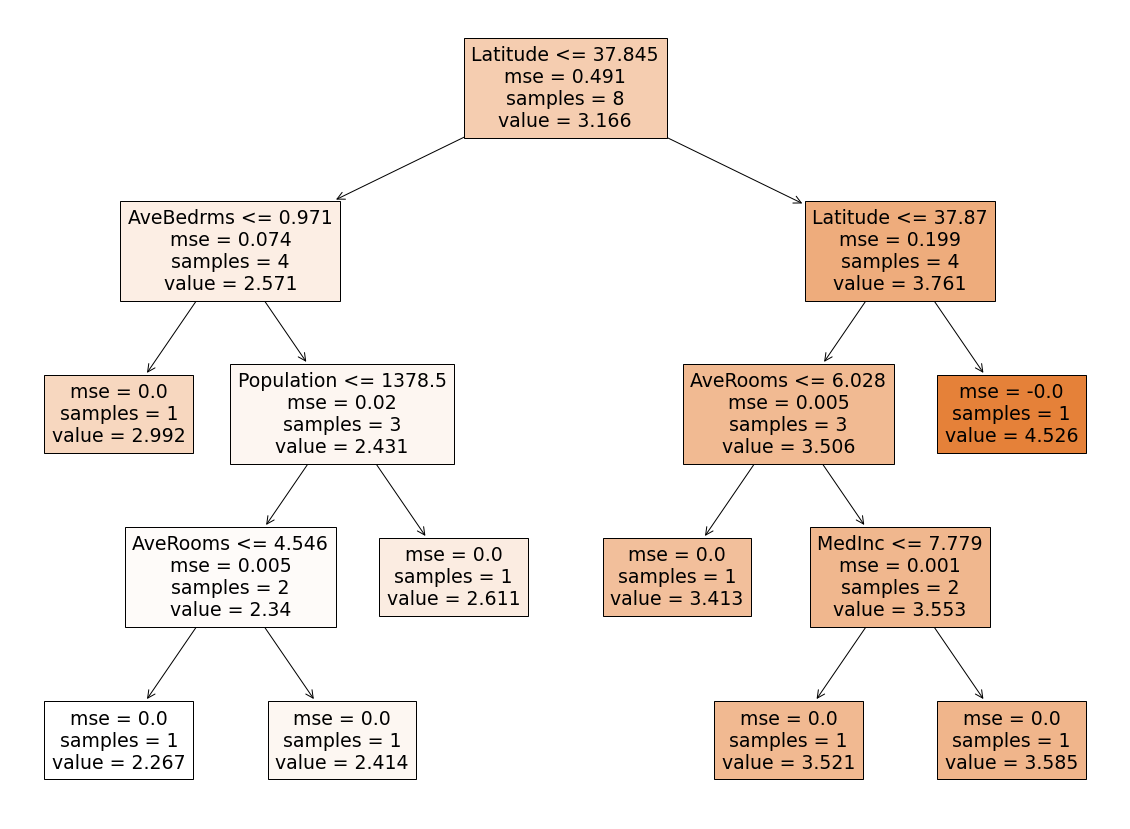

In [ ]:
plt.figure(figsize=(10, 10))
plot_tree(tree, feature_names=features, filled=True);

Давайте попытаемся снизить переобучение с помощью max_depth, поставим ему значение поменьше, тем самым запретим дереву быть слишком сложным.

Поставим к примеру значение равное 2. Теперь видим, что есть только два уровня с вопросами, вопросов 3 штуки, а листев с предсказаниями 4.

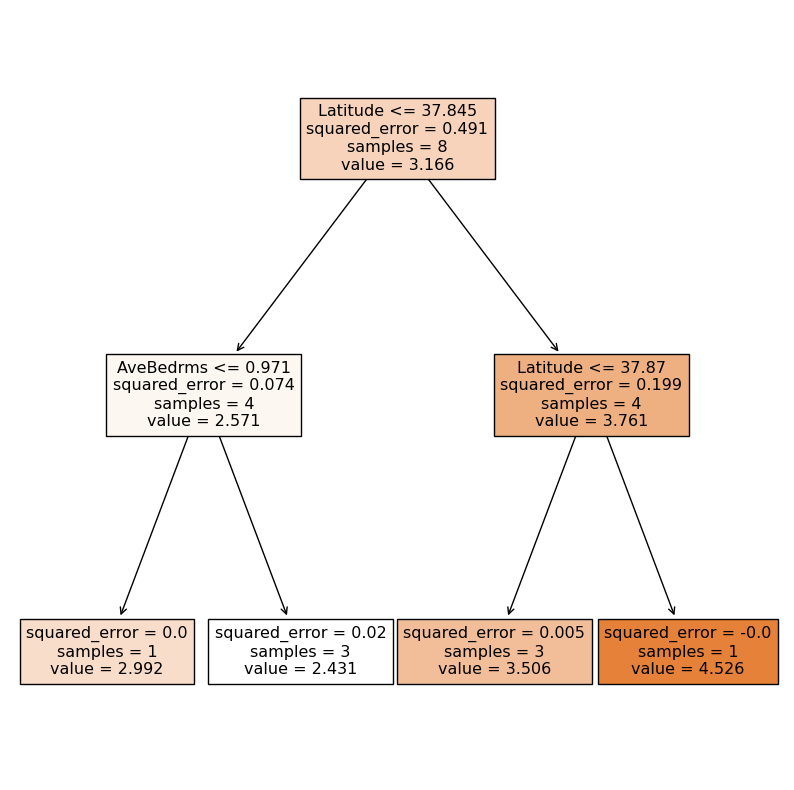

In [ ]:
tree = DecisionTreeRegressor(random_state=1, max_depth=2)
tree.fit(X_train, y_train)

plt.figure(figsize=(10, 10))
plot_tree(tree, feature_names=features, filled=True);

### min_samples_leaf

Едем дальше и сейчас смотрим на критерий останова `min_samples_leaf` - минимальное количество объектов в одном листе.

С чем нам поможет данный критерий? Снова вспомним, что наши деревья решений любители допрашивать данные и они очень любят определенность, по этому они могут докапаться до истины посредством отделения каждого объекта в индивидуальный лист, критерий останова по минимальному количеству объектов в одном листе помогает не допускать ужасного сценария переобучения.

По умолчанию `min_samples_leaf` равен 1, а значит мы позволяем дереву строить листья с одним объектом в листе, из-за этого получаем идеальную подгонку обучающей выборки и далеко неидеальную картину на тесте.

Изменим аргумент на значение 2, чтобы дерево пыталось строить более обобщенную модель.

Видим, что теперь samples в каждом конечном узле равно два, значит там находится по два объекта, как мы и просили у дерева.

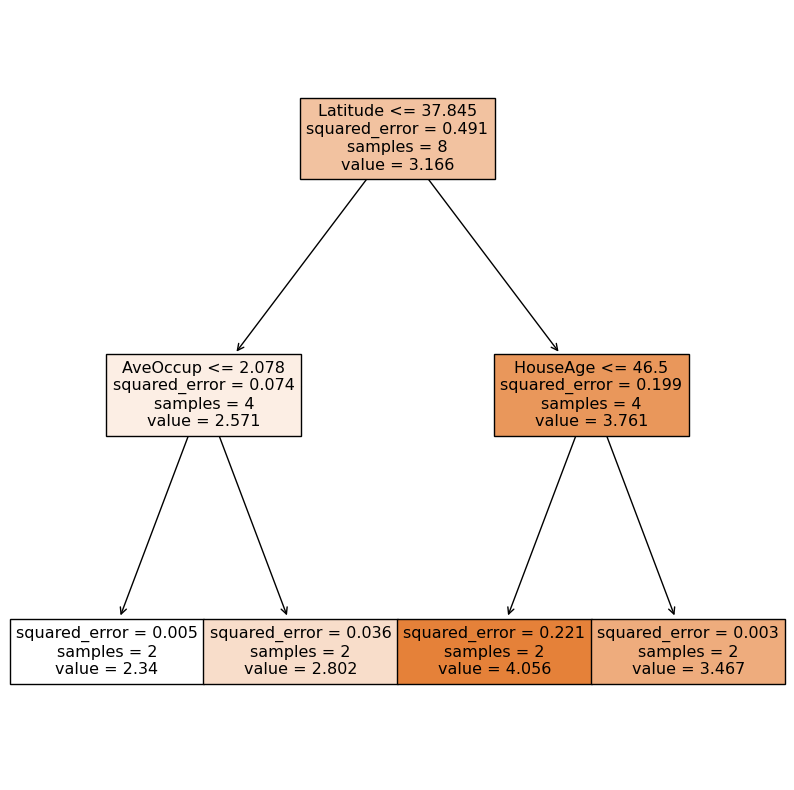

In [ ]:
tree = DecisionTreeRegressor(random_state=1, min_samples_leaf=2)
tree.fit(X_train, y_train)

plt.figure(figsize=(10, 10))
plot_tree(tree, feature_names=features, filled=True);

### max_leaf_nodes

И остается у нас на сегодня критерий останова `max_leaf_nodes` - максимальное количество листьев.

Чем больше листьев, тем больше переобучение, потому что модель более сложная.

По умолчанию `max_leaf_nodes` равен None, а значит ничем не ограничен и дерево будет строиться пока есть силы для подгонки.


В самом первом, самом переобученном дереве было 8 листьев, ровно столько же, сколько у нас есть объектов в обучении, сделаем количество листьев поменьше, чтобы и переобучения было поменьше.

И видим, что теперь количество листьев действительно равно 5.

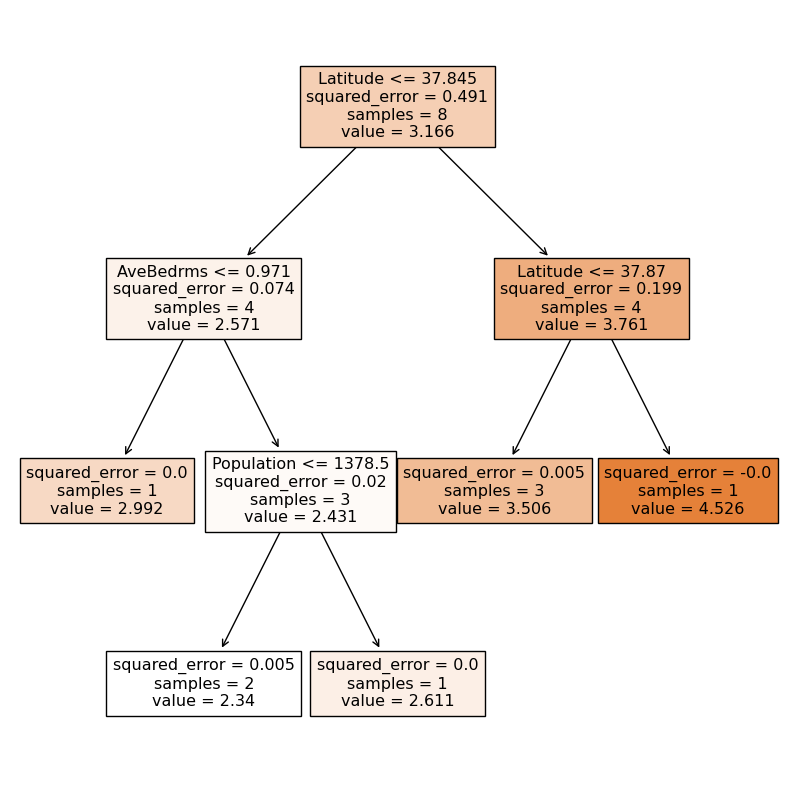

In [ ]:
tree = DecisionTreeRegressor(random_state=1, max_leaf_nodes=5)
tree.fit(X_train, y_train)

plt.figure(figsize=(10, 10))
plot_tree(tree, feature_names=features, filled=True);

## Как этим пользоваться?

Данные критерии конечно же можем использовать вместе для более высокого качества работы модели, да и по факту они все связаны между собой: чем меньше уровней с вопросами (`max_depth`), тем меньше вопросов и меньше листьев (`max_leaf_nodes`), тем больше количество объектов в одном листе (`min_samples_leaf`).

Давайте возьмем весь датасет и попытаемся подобрать самые лучшие параметры дерева решений.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df_full[features],
    df_full['target'],
    test_size=0.2,
    shuffle=True,
    random_state=3
)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((16512, 8), (16512,), (4128, 8), (4128,))

Пока обучимся на параметрах по умолчанию:
- `max_depth=None`
- `min_samples_leaf=1`
- `max_leaf_nodes=None`

In [ ]:
tree = DecisionTreeRegressor(random_state=1)
tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

И естественно видим переобучение, метрика на обучении идеальная, мы каждый объект предсказали правильно, а вот на тесте совсем не симпатично. Будем исправлять.

In [ ]:
pred_train = tree.predict(X_train)
pred_test = tree.predict(X_test)

mse_train = mean_squared_error(y_train, pred_train)
mse_test = mean_squared_error(y_test, pred_test)

print(f'MSE на обучении {mse_train:.2f}')
print(f'MSE на тесте {mse_test:.2f}')

MSE на обучении 0.00
MSE на тесте 0.52


Т.к. пока вообще не знаем откуда стартовать, то давайте пойдем по порядку и поизменяем максимальную глубину, возьмем случайное число из головы и поставим.

Разница в метриках стала меньше, а значит переобучение тоже уменьшилось, плюс наша метрика на тесте стала лучше.

In [ ]:
tree = DecisionTreeRegressor(random_state=1,
                             max_depth=15,
                             min_samples_leaf=1,
                             max_leaf_nodes=None)
tree.fit(X_train, y_train)

pred_train = tree.predict(X_train)
pred_test = tree.predict(X_test)

mse_train = mean_squared_error(y_train, pred_train)
mse_test = mean_squared_error(y_test, pred_test)

print(f'MSE на обучении {mse_train:.2f}')
print(f'MSE на тесте {mse_test:.2f}')

MSE на обучении 0.04
MSE на тесте 0.48


Давайте поиграемся с максимальным количеством листьев, поставим число 500, может повезет.

In [ ]:
tree = DecisionTreeRegressor(random_state=1,
                             max_depth=15,
                             min_samples_leaf=1,
                             max_leaf_nodes=500)
tree.fit(X_train, y_train)

pred_train = tree.predict(X_train)
pred_test = tree.predict(X_test)

mse_train = mean_squared_error(y_train, pred_train)
mse_test = mean_squared_error(y_test, pred_test)

print(f'MSE на обучении {mse_train:.2f}')
print(f'MSE на тесте {mse_test:.2f}')

MSE на обучении 0.19
MSE на тесте 0.40


Вроде как повезло, тенденция отличная, переобучения меньше, а метрика на тесте всё улучшается.

Действуем дальше и можем изменить минимальное количество объектов в одном листе, сделаем его больше.

In [ ]:
tree = DecisionTreeRegressor(random_state=1,
                             max_depth=15,
                             min_samples_leaf=10,
                             max_leaf_nodes=500)
tree.fit(X_train, y_train)

pred_train = tree.predict(X_train)
pred_test = tree.predict(X_test)

mse_train = mean_squared_error(y_train, pred_train)
mse_test = mean_squared_error(y_test, pred_test)

print(f'MSE на обучении {mse_train:.2f}')
print(f'MSE на тесте {mse_test:.2f}')

MSE на обучении 0.22
MSE на тесте 0.35


Пока мы делаем всё отлично. Остается дальше нащупывать дорогу и двигаться по ней.


In [ ]:
tree = DecisionTreeRegressor(random_state=1,
                             max_depth=13,
                             min_samples_leaf=10,
                             max_leaf_nodes=500)
tree.fit(X_train, y_train)

pred_train = tree.predict(X_train)
pred_test = tree.predict(X_test)

mse_train = mean_squared_error(y_train, pred_train)
mse_test = mean_squared_error(y_test, pred_test)

print(f'MSE на обучении {mse_train:.2f}')
print(f'MSE на тесте {mse_test:.2f}')

MSE на обучении 0.23
MSE на тесте 0.36



Уменьшив max_depth с 15 до 13 мы потеряли более хорошую метрику на тесте, не есть хорошо, так что пробуем другое.

In [ ]:
tree = DecisionTreeRegressor(random_state=1,
                             max_depth=14,
                             min_samples_leaf=10,
                             max_leaf_nodes=500)
tree.fit(X_train, y_train)

pred_train = tree.predict(X_train)
pred_test = tree.predict(X_test)

mse_train = mean_squared_error(y_train, pred_train)
mse_test = mean_squared_error(y_test, pred_test)

print(f'MSE на обучении {mse_train:.2f}')
print(f'MSE на тесте {mse_test:.2f}')

MSE на обучении 0.23
MSE на тесте 0.35


С `max_depth=14` вышло лучше.

И так можно делать очень долго, пока вы не будете довольны своей моделью. В целом, немного поизменяв параметры, я осталась довольна этими метриками.

In [ ]:
tree = DecisionTreeRegressor(random_state=1,
                             max_depth=14,
                             min_samples_leaf=24,
                             max_leaf_nodes=400)
tree.fit(X_train, y_train)

pred_train = tree.predict(X_train)
pred_test = tree.predict(X_test)

mse_train = mean_squared_error(y_train, pred_train)
mse_test = mean_squared_error(y_test, pred_test)

print(f'MSE на обучении {mse_train:.2f}')
print(f'MSE на тесте {mse_test:.2f}')

MSE на обучении 0.28
MSE на тесте 0.34


Советую изменять только один параметр за раз и мониторить, что произошло, что поменялось:
- если стало хуже, нужно откатиться
- если стало лучше, вы сделали всё верно.

Нужно нащупывать границы в параметрах, когда модель начинает вести себя лучше и не переобучаться.

Наверняка может показаться, что как будто что-то не то, как будто есть запах рутины, мы руками очень много и долго ищем параметры. И правильно кажется, естественно есть инструменты, позволяющие это автоматизировать. Про них можем пообщаться в следующих роликах.

## Summary

Пришла пора подвести итоги сегодняшнего занятия. Посмотрели на основные критерии останова в модели дерево решений. Они помогают снизить сложность модели, а значит снизить переобучение, а значит увеличить качество модели.

<table>

<tr>
<td>
Критерий останова
</td>

<td>
Смысл
</td>

<td>
Что делать, что бы<br> уменьшить переобучение
</td>


</tr>

<tr>
<td>
max_depth
</td>

<td>
<b>максимальное кол-во уровней с вопросами</b><br>
чем глубже дерево, тем оно сложнее
</td>

<td>
▼ уменьшать
</td>

</tr>

<tr>
<td>
min_samples_leaf

</td>

<td>
<b>минимальное кол-во объектов в одном листе</b><br>
если в листе один объект - это скорее всего<br> сложная модель с низким уровнем обощения
</td>

<td>
▲ увеличивать
</td>

</tr>

<tr>
<td>
max_leaf_nodes

</td>

<td>
<b>максимальное вол-во листьев</b><br>
чем больше листьев, тем больше вероятность<br> сделать индивидуальный лист для объекта
</td>

<td>
▼ уменьшать
</td>

</tr>


</table>